<a href="https://colab.research.google.com/github/kriskirla/AllProjects/blob/master/Algotrading/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program will predict the stock for a specific day using ML

In [ ]:
!pip install yfinance

In [5]:
# Import libaries
from sklearn.svm import SVR
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
ticker = "AAPL";

# Get data from yahoo finance
df = yf.download(ticker, start="2020-01-01", end="2020-01-31")#end=dt.today().strftime('%Y-%m-%d'))

In [42]:
# Get the last row of data to test the correctness
actual_price = df.tail(1)
actual_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-30,80.135002,81.022499,79.6875,80.967499,80.154472,126743200


In [43]:
# Get the data except for the last row
df = df.head(len(df) - 1)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.333511,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.610840,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.197395,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.848442,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,75.036385,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,76.630219,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,76.803459,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,78.444321,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,77.385063,161954400


In [ ]:
# Create independant dataset and dependant dataset
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

days = [[i.day] for i in df_days ]
adj_close_price = [float(price) for price in df_adj_close]

days

In [ ]:
# Linear Model
lin_svr = SVR(kernel='linear', C=1000)
lin_svr.fit(days, adj_close_price)
# Polynomial Model
poly_svr = SVR(kernel='poly', C=1000, degree=2)
poly_svr.fit(days, adj_close_price)
# Radial Basis Function Model
rbf_svr = SVR(kernel='rbf', C=1000, gamma=0.85)
rbf_svr.fit(days, adj_close_price)

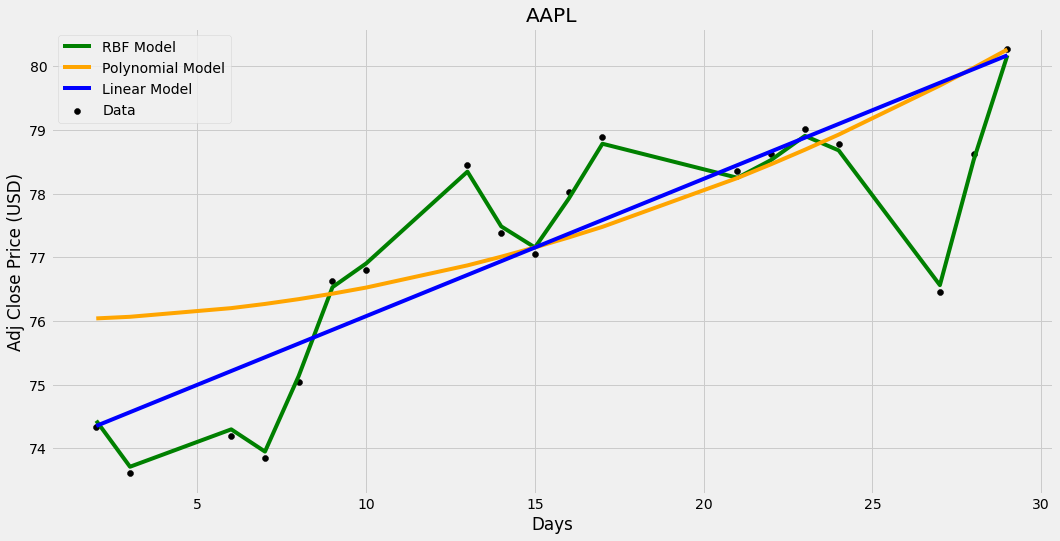

In [62]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_price, color='black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Adj Close Price (USD)')
plt.legend()
plt.show()

In [73]:
# Show the predicted price for the given day
day = [[30]]

print(f"Predicted price using RBF Model: {rbf_svr.predict(day)}")
print(f"Predicted price using Polynomial Model: {poly_svr.predict(day)}")
print(f"Predicted price using Linear Model: {lin_svr.predict(day)}")
print(f"Actual Price: {actual_price.iloc[0]['Adj Close']}")

Predicted price using RBF Model: [77.17298564]
Predicted price using Polynomial Model: [80.8676817]
Predicted price using Linear Model: [80.60184174]
Actual Price: 80.15447235107422
